# Linear regression

## Apply a multiple linear regresssion on the given dataset.

### Variable list

* G3: dependent variable, which means final grade (numeric from 0 to 20)
* school: school (binary: GP or MS)
* sex: sex (binary: F or M)
* age: age (numeric from 15 to 22)
* address: home address type (binary: U or R)
* famsize: family size (binary: LE3 or GT3)
* Pstatus: parent's cohabitation status (binary: T or A)
* Medu: mother's education (ordinal: from 0 to 4)
* Fedu: father's education (ordinal: from 0 to 4)
* Mjob: mother's job (nominal: 5 categories)
* Fjob: father's job (nominal: 5 categories)
* reason: reason to choose this school (nominal: 3 categories)
* guardian: guardian (nominal: 3 categories)
* traveltime: home to school travel time (ordinal: from 1 to 4)
* studytime: weekly study time (ordinal: from 1 to 4)
* failures: number of pass class failures (ordinal: from 1 to 4)
* schoolsup: extra educational support (binary: yes or no)
* famsup: family educational support (binary: yes or no)
* paid: extra paid classes within the course subject (binary: yes or no)
* activities: extra-curricular activities (binary: yes or no)
* nursery: attended nursery school (binary: yes or no)
* higher: wants to take higher education (binary: yes or no)
* internet: internet access at home (binary: yes or no)
* romantic: with a romantic relationship (binary: yes or no)
* famrel: quality of family relationship (ordinal: from 1 to 5)
* freetime: free time after school (ordinal: from 1 to 5)
* goout: going out with friends (ordinal: from 1 to 5)
* Dalc: Workday alcohol consumption (ordinal: from 1 to 5)
* Walc: Weekend alcohol consumption (ordinal: from 1 to 5)
* health: current health status (ordinal: from 1 to 5)
* absences: number of school absences (numeric: from 0 to 93)
* course: course of the grade (binary: math or portuguese)

In [1]:
binaries = [
    "school", "sex", "address", "famsize", "Pstatus", "schoolsup", 
    "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic", 
    "course"
]
numerics = ["age", "absences"]
ordinal = [
    "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", 
    "Dalc", "Walc", "health"
]
nominal = ["Mjob", "Fjob", "reason", "guardian"]

In [2]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import t, f, chi2, skew, kurtosis
from sklearn.linear_model import LinearRegression

## Part 1: Pre-processing

1-(1). some input variables contain missing values. If the proportion of missing values in a variable exceeds 80%, the variable should be excluded from the dataset. Is there any variable to be excluded?

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv("students_grade.csv")

missing_values = df.isnull().sum()    
percentage_missing = (missing_values / len(df)) *100  
variables_to_exclude = percentage_missing[percentage_missing > 80]
print(variables_to_exclude)

df = df.drop(variables_to_exclude.index, axis=1)

famsize       84.770115
activities    84.865900
dtype: float64


1-(2) After excluding some variables if necessary, some rows containing missing values should be deleted from the dataset. How many samples need to be removAfter removing any sample with missing values, how many samples remain in the dataset?

In [4]:
df_cleaned = df.dropna()
df = df_cleaned
print(len(df_cleaned))
print(df_cleaned)

761
     school sex   age address Pstatus  Medu  Fedu      Mjob      Fjob  \
0        GP   F  18.0       U       A   4.0   4.0   at_home   teacher   
1        GP   F  17.0       U       T   1.0   1.0   at_home     other   
2        GP   F  15.0       U       T   1.0   1.0   at_home     other   
4        GP   F  16.0       U       T   3.0   3.0     other     other   
5        GP   M  16.0       U       T   4.0   3.0  services     other   
6        GP   M  16.0       U       T   2.0   2.0     other     other   
8        GP   M  15.0       U       A   3.0   2.0  services     other   
10       GP   F  15.0       U       T   4.0   4.0   teacher    health   
11       GP   F  15.0       U       T   2.0   1.0  services     other   
12       GP   M  15.0       U       T   4.0   4.0    health  services   
13       GP   M  15.0       U       T   4.0   3.0   teacher     other   
14       GP   M  15.0       U       A   2.0   2.0     other     other   
16       GP   F  16.0       U       T   4.0   4

### For all subsequent questions, the data pre-processed above are used.

Transform binaries or nominal variables into dummy variables (0 and 1) for further analysis.

1-(3) Find the top 10 input variables that show the high linear correlation with the target based on the correlation coefficients.

In [5]:
for var in variables_to_exclude.index:
    if var in binaries:
        binaries.remove(var)
    elif var in nominal:
        nominal.remove(var)
    elif var in ordinal:
        ordinal.remove(var)
        
dummy_variables_df = pd.get_dummies(df[binaries + nominal], drop_first=True)

non_dummy_variables = [col for col in df.columns if col not in binaries + nominal]
non_dummy_df = df[non_dummy_variables]

merged_df = pd.concat([non_dummy_df, dummy_variables_df], axis=1)
# merged_df.to_excel("merged_file.xlsx", index=False)
correlation = merged_df.corr()['G3'].abs().sort_values(ascending=False)
top_10_correlation = correlation.head(11)
print(top_10_correlation)

G3                   1.000000
failures             0.355073
higher_yes           0.260030
Medu                 0.210133
Fedu                 0.186575
course_portuguese    0.182414
studytime            0.142846
school_MS            0.136915
romantic_yes         0.128696
age                  0.124083
guardian_other       0.122843
Name: G3, dtype: float64


1-(4) Draw pairwise scatter plots - one scatter plot illustrates the pairwise relationship between one of input variables selected in 1-(3) and output target.

In [6]:
top_input_variables = correlation.index[1:11]
for input_variable in top_input_variables:
    plt.figure(figsize=(6, 4))
    
    if merged_df[input_variable].dtype == 'bool':
        plt.scatter(merged_df[input_variable], merged_df['G3'], alpha=0.5)
    else:
        colors = merged_df[input_variable] / merged_df[input_variable].max()
        plt.scatter(merged_df[input_variable], merged_df['G3'], c=colors, cmap='viridis', alpha=0.5)
        
        cbar = plt.colorbar()
        cbar.set_label(input_variable, rotation=270)
    
    plt.title("Scatter Plot between {} and G3".format(input_variable))
    plt.xlabel(input_variable)
    plt.ylabel('G3')
    plt.grid(True)
    
    plt.savefig('scatter_plot_{}.png'.format(input_variable), bbox_inches='tight')
    plt.close() 


1-(5) Calculate variance inflation factor (VIF) for each explanatory variable and summarize the values using a table.

In [7]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [1 / (1 - LinearRegression().fit(X.drop(col, axis=1), X[col]).score(X.drop(col, axis=1), X[col])) for col in X.columns]
    return vif_data

# VIF 계산
vif_results = calculate_vif(merged_df)

# 결과 출력
print(vif_results)
vif_results.to_excel("vif_result_final.xlsx", index=False)

             Variable       VIF
0                 age  1.388230
1                Medu  2.797083
2                Fedu  2.198711
3          traveltime  1.293246
4           studytime  1.257459
5            failures  1.393125
6              famrel  1.137178
7            freetime  1.251613
8               goout  1.417067
9                Dalc  1.848905
10               Walc  2.122693
11             health  1.136783
12           absences  1.218337
13                 G3  1.406420
14          school_MS  1.600930
15              sex_M  1.345492
16          address_U  1.317693
17          Pstatus_T  1.133178
18      schoolsup_yes  1.153156
19         famsup_yes  1.141389
20           paid_yes  1.462653
21        nursery_yes  1.090246
22         higher_yes  1.256417
23       internet_yes  1.251754
24       romantic_yes  1.109330
25  course_portuguese  1.549223
26        Mjob_health  1.810842
27         Mjob_other  2.313649
28      Mjob_services  2.380268
29       Mjob_teacher  2.541970
30      

1-(6) According to the results of question 1-(5), describe your opinion on how to select which variables should be excluded from training a linear regression model. Only in this assignment, if the VIF is 4 or greater, the multicollinearity is considerede to be severe.

## Part 2: Modeling

2-(1) Train a linear regression model (M1) using all variables and fill the following table. (전처리 끝난 거 기준으로)

In [8]:
target_variable = 'G3'
m1_df = merged_df.copy()

x1 = m1_df.drop(target_variable, axis=1)
y1 = m1_df[target_variable]

n_sample_m1, n_feature_m1 = x1.shape
print(n_sample_m1)
print(n_feature_m1)

x1 = x1.astype(float)
x1_c1 = np.c_[np.ones(n_sample_m1), x1]
xtx1 = np.matmul(x1_c1.T, x1_c1)
xtx_inv1 = np.linalg.inv(xtx1)
beta1 = np.matmul(np.matmul(xtx_inv1, x1_c1.T), y1)
y_hat1 = np.matmul(x1_c1, beta1)
y_bar1 = np.mean(y1)
sst1 = np.sum((y1 - y_bar1) ** 2)
ssr1 = np.sum((y_hat1 - y_bar1) ** 2)
sse1 = np.sum((y1 - y_hat1) ** 2)

mse1 = sse1 / (n_sample_m1 - n_feature_m1 - 1)
msr1 = ssr1 / n_feature_m1
f1 = msr1 / mse1

se_beta1 = np.sqrt(np.diag(mse1 * xtx_inv1))
dfree1 = n_sample_m1 - n_feature_m1 - 1
t_stat1 = beta1 / se_beta1

alpha = 0.05
p_val = (1 - t.cdf(np.abs(t_stat1), dfree1)) * 2
r2 = ssr1 / sst1
adj_r2_1 = 1 - (sse1 / (n_sample_m1 - n_feature_m1 - 1)) / (sst1 / (n_sample_m1 - 1))

# 선형 회귀 모델
model1 = LinearRegression()
model1.fit(x1, y1)

intercept = beta1[0]

intercept_info = {
    'Variable': 'Intercept',
    'Coefficient': intercept,
    'se': se_beta1[0],
    't': t_stat1[0],
    'p-value': p_val[0]
}

variable_info = []

for i, col_name in enumerate(x1.columns):
    variable_info.append({
        'Variable': col_name,
        'Coefficient': model1.coef_[i],  
        'se': se_beta1[i+1],
        't': t_stat1[i+1],
        'p-value': p_val[i+1]
    })

info_df1 = pd.DataFrame([intercept_info] + variable_info)

print(info_df1)
info_df1.to_excel("information_final.xlsx", index="False")

761
38
             Variable  Coefficient        se         t       p-value
0           Intercept     6.769836  2.301893  2.940986  3.376330e-03
1                 age     0.088557  0.114256  0.775070  4.385519e-01
2                Medu     0.178568  0.182317  0.979436  3.276925e-01
3                Fedu     0.092802  0.161971  0.572956  5.668530e-01
4          traveltime     0.015279  0.181455  0.084200  9.329205e-01
5           studytime     0.311289  0.159103  1.956524  5.078857e-02
6            failures    -1.283212  0.206145 -6.224792  8.174548e-10
7              famrel     0.352765  0.134150  2.629627  8.729850e-03
8            freetime     0.182381  0.133326  1.367937  1.717575e-01
9               goout    -0.315549  0.124801 -2.528423  1.166964e-02
10               Dalc    -0.053526  0.181786 -0.294448  7.685003e-01
11               Walc     0.042870  0.136323  0.314474  7.532516e-01
12             health    -0.263712  0.089340 -2.951784  3.261854e-03
13           absences     0

2-(2) Train a linear regression model (M2) using the selected variable in question 1-(3) and fill the following table.

In [9]:
# bool_columns = df.columns[df.dtypes == bool]
# for bool_column_name in bool_columns:
#     df[bool_column_name] = df[bool_column_name].map({True: 1, False: 0})
m2_df = merged_df[top_10_correlation.index]

target_variable = 'G3'

x2 = m2_df.drop(target_variable, axis=1)
y2 = m2_df[target_variable]

n_sample_m2, n_feature_m2 = x2.shape

x2 = x2.astype(float)
x2_c1 = np.c_[np.ones(n_sample_m2), x2]

xtx2 = np.matmul(x2_c1.T, x2_c1)
xtx_inv2 = np.linalg.inv(xtx2)

beta2 = np.matmul(np.matmul(xtx_inv2, x2_c1.T), y2)

y_hat2 = np.matmul(x2_c1, beta2)

y_bar2 = np.mean(y2)
sst2 = np.sum((y2 - y_bar2) ** 2)
ssr2 = np.sum((y_hat2 - y_bar2) ** 2)
sse2 = np.sum((y2 - y_hat2) ** 2)

mse2 = sse2 / (n_sample_m2 - n_feature_m2 - 1)
msr2 = ssr2 / n_feature_m2

f2 = msr2 / mse2

se_beta2 = np.sqrt(np.diag(mse2 * xtx_inv2))
dfree2 = n_sample_m2 - n_feature_m2 - 1
t_stat2 = beta2 / se_beta2

alpha = 0.05
p_val = (1 - t.cdf(np.abs(t_stat2), dfree2)) * 2

r2 = ssr2 / sst2
adj_r2_2 = 1 - (sse2 / (n_sample_m2 - n_feature_m2 - 1)) / (sst2 / (n_sample_m2 - 1))

model2 = LinearRegression()
model2.fit(x2, y2)

intercept = beta2[0]

intercept_info = {
    'Variable': 'Intercept',
    'Coefficient': intercept,
    'se': se_beta2[0],
    't': t_stat2[0],
    'p-value': p_val[0]
}

variable_info = []

for i, col_name in enumerate(x2.columns):
    variable_info.append({
        'Variable': col_name,
        'Coefficient': model2.coef_[i],  # Coefficient
        'se': se_beta2[i+1],             # Standard Error
        't': t_stat2[i+1],               # t-statistic
        'p-value': p_val[i+1]           # p-value
    })

info_df2 = pd.DataFrame([intercept_info] + variable_info)

# 결과 출력
print(info_df2)
info_df2.to_excel("information.xlsx", index="False") 


             Variable  Coefficient        se         t       p-value
0           Intercept     5.729305  1.970948  2.906877  3.758213e-03
1            failures    -1.401858  0.203443 -6.890659  1.177569e-11
2          higher_yes     2.133628  0.468250  4.556596  6.067605e-06
3                Medu     0.347165  0.150274  2.310217  2.114674e-02
4                Fedu     0.134870  0.149402  0.902730  3.669589e-01
5   course_portuguese     1.818379  0.266649  6.819373  1.882672e-11
6           studytime     0.314788  0.151064  2.083808  3.751563e-02
7           school_MS    -1.131269  0.301710 -3.749524  1.908068e-04
8        romantic_yes    -0.747690  0.260299 -2.872421  4.188385e-03
9                 age     0.097875  0.109772  0.891623  3.728809e-01
10     guardian_other    -0.444583  0.514358 -0.864346  3.876741e-01


2-(3) Train a linear regression model (M3) using the selected variables in question 1-(6) and fill the following table.

In [11]:
m3_df = merged_df.drop(columns=['Fjob_other'])
target_variable3 = 'G3'

x3 = m3_df.drop(target_variable3, axis=1)
y3 = m3_df[target_variable3]

n_sample_m3, n_feature_m3 = x3.shape
print(n_sample_m3)
print(n_feature_m3)

x3 = x3.astype(float)
x3_c = np.c_[np.ones(n_sample_m3), x3]

xtx3 = np.matmul(x3_c.T, x3_c)
xtx_inv3 = np.linalg.inv(xtx3)

beta3 = np.matmul(np.matmul(xtx_inv3, x3_c.T), y3)

y_hat3 = np.matmul(x3_c, beta3)

y_bar3 = np.mean(y3)
sst3 = np.sum((y3 - y_bar3) ** 2)
ssr3 = np.sum((y_hat3 - y_bar3) ** 2)
sse3 = np.sum((y3 - y_hat3) ** 2)

mse3 = sse3 / (n_sample_m3 - n_feature_m3 - 1)
msr3 = ssr3 / n_feature_m3

f3 = msr3 / mse3

se_beta3 = np.sqrt(np.diag(mse3 * xtx_inv3))
dfree3 = n_sample_m3 - n_feature_m3 - 1
t_stat3 = beta3 / se_beta3

alpha3 = 0.05
p_val3 = (1 - t.cdf(np.abs(t_stat3), dfree3)) * 2

r23 = ssr3 / sst3
adj_r2_3 = 1 - (sse3 / (n_sample_m3 - n_feature_m3 - 1)) / (sst3 / (n_sample_m3 - 1))

# 선형 회귀 모델
model3 = LinearRegression()
model3.fit(x3, y3)

intercept3 = beta3[0]

intercept_info3 = {
    'Variable': 'Intercept3',
    'Coefficient': intercept3,
    'se': se_beta3[0],
    't': t_stat3[0],
    'p-value': p_val3[0]
}

variable_info3 = []

for i, col_name in enumerate(x3.columns):
    variable_info3.append({
        'Variable': col_name,
        'Coefficient': model3.coef_[i], 
        'se': se_beta3[i+1],        
        't': t_stat3[i+1],      
        'p-value': p_val3[i+1] 
    })

info_df3 = pd.DataFrame([intercept_info3] + variable_info3)

print(info_df3)
info_df3.to_excel("information_m3.xlsx", index="False")

761
37
             Variable  Coefficient        se         t       p-value
0          Intercept3     6.723296  2.245032  2.994743  2.840543e-03
1                 age     0.089210  0.113961  0.782809  4.339957e-01
2                Medu     0.178570  0.182192  0.980120  3.273547e-01
3                Fedu     0.092356  0.161788  0.570846  5.682816e-01
4          traveltime     0.013544  0.180365  0.075090  9.401636e-01
5           studytime     0.311286  0.158994  1.957848  5.063213e-02
6            failures    -1.283287  0.206002 -6.229481  7.940131e-10
7              famrel     0.352366  0.133989  2.629807  8.725035e-03
8            freetime     0.182572  0.133218  1.370477  1.709634e-01
9               goout    -0.315675  0.124708 -2.531308  1.157463e-02
10               Dalc    -0.053073  0.181595 -0.292262  7.701705e-01
11               Walc     0.042074  0.135959  0.309460  7.570611e-01
12             health    -0.263898  0.089256 -2.956637  3.211435e-03
13           absences     0

In [13]:
# 데이터프레임을 내림차순으로 정렬
info_df1 = info_df1.sort_values(by='Coefficient', ascending=False)
info_df2 = info_df2.sort_values(by='Coefficient', ascending=False)
info_df3 = info_df3.sort_values(by='Coefficient', ascending=False)

with pd.ExcelWriter('multiple_sheets1.xlsx') as writer:
    info_df1.to_excel(writer, sheet_name='info_df1', index=False)
    info_df2.to_excel(writer, sheet_name='info_df2', index=False)
    info_df3.to_excel(writer, sheet_name='info_df3', index=False)

## Part 3: Assessment

3-(1) Apply the F-test on M1, M2, and M3 and explain the results. In addition fill the following table.

In [14]:
def calculate_f_test(ssr, sse, df_model, df_resid):
    msr = ssr / df_model
    mse = sse / df_resid
    f_statistic = msr / mse
    p_value = 1 - f.cdf(f_statistic, df_model, df_resid)
    return f_statistic, p_value

f_statistic_m1, p_value_m1 = calculate_f_test(ssr1, sse1, n_feature_m1, n_sample_m1 - n_feature_m1 - 1)
f_statistic_m2, p_value_m2 = calculate_f_test(ssr2, sse2, n_feature_m2, n_sample_m2 - n_feature_m2 - 1)
f_statistic_m3, p_value_m3 = calculate_f_test(ssr3, sse3, n_feature_m3, n_sample_m3 - n_feature_m3 - 1)

table_m1 = pd.DataFrame({
    'Model': ['M1', 'Residual', 'Total'],
    'SS': [ssr1, sse1, sst1],
    'Degree of freedom': [n_feature_m1, n_sample_m1 - n_feature_m1 - 1, n_sample_m1 - 1],
    'MS': [ssr1 / n_feature_m1, sse1 / (n_sample_m1 - n_feature_m1 - 1), sse1 / (n_sample_m1 - 1)],
    'F': [f_statistic_m1, None, None],
    'p-value': [p_value_m1, None, None]
})

table_m2 = pd.DataFrame({
    'Model': ['M2', 'Residual', 'Total'],
    'SS': [ssr2, sse2, sst2],
    'Degree of freedom': [n_feature_m2, n_sample_m2 - n_feature_m2 - 1, n_sample_m2 - 1],
    'MS': [ssr2 / n_feature_m2, sse2 / (n_sample_m2 - n_feature_m2 - 1), sse2 / (n_sample_m2 - 1)],
    'F': [f_statistic_m2, None, None],
    'p-value': [p_value_m2, None, None]
})

table_m3 = pd.DataFrame({
    'Model': ['M3', 'Residual', 'Total'],
    'SS': [ssr3, sse3, sst3],
    'Degree of freedom': [n_feature_m3, n_sample_m3 - n_feature_m3 - 1, n_sample_m3 - 1],
    'MS': [ssr3 / n_feature_m3, sse3 / (n_sample_m3 - n_feature_m3 - 1), sse3 / (n_sample_m3 - 1)],
    'F': [f_statistic_m3, None, None],
    'p-value': [p_value_m3, None, None]
})


print("Model M1:")
print(table_m1)

print("\nModel M2:")
print(table_m2)

print("\nModel M3:")
print(table_m3)

with pd.ExcelWriter('f_test_results4.xlsx') as writer:
    table_m1.to_excel(writer, sheet_name='Model M1', index=False)
    table_m2.to_excel(writer, sheet_name='Model M2', index=False)
    table_m3.to_excel(writer, sheet_name='Model M3', index=False) 


Model M1:
      Model            SS  Degree of freedom         MS         F  \
0        M1   3242.266481                 38  85.322802  7.721972   
1  Residual   7977.633650                722  11.049354       NaN   
2     Total  11219.900131                760  10.496886       NaN   

        p-value  
0  1.110223e-16  
1           NaN  
2           NaN  

Model M2:
      Model            SS  Degree of freedom          MS          F  \
0        M2   2660.173026                 10  266.017303  23.308334   
1  Residual   8559.727106                750   11.412969        NaN   
2     Total  11219.900131                760   11.262799        NaN   

        p-value  
0  1.110223e-16  
1           NaN  
2           NaN  

Model M3:
      Model            SS  Degree of freedom         MS         F  \
0        M3   3242.171366                 37  87.626253  7.941331   
1  Residual   7977.728766                723  11.034203       NaN   
2     Total  11219.900131                760  10.497012

3-(2) Calculate R-square and adjusted R-square for M1, M2, and M3. Then, compare the models.

In [15]:
def calculate_r_squared(ssr, sst, n_sample, n_feature):
    r_squared = ssr / sst
    adj_r_squared = 1 - (1 - r_squared) * ((n_sample - 1) / (n_sample - n_feature - 1))
    return r_squared, adj_r_squared

r_squared_m1, adj_r_squared_m1 = calculate_r_squared(ssr1, sst1, n_sample_m1, n_feature_m1)
r_squared_m2, adj_r_squared_m2 = calculate_r_squared(ssr2, sst2, n_sample_m2, n_feature_m2)
r_squared_m3, adj_r_squared_m3 = calculate_r_squared(ssr3, sst3, n_sample_m3, n_feature_m3)

print("Model M1:")
print("R-squared:", r_squared_m1)
print("Adjusted R-squared:", adj_r_squared_m1)
print("\nModel M2:")
print("R-squared:", r_squared_m2)
print("Adjusted R-squared:", adj_r_squared_m2)
print("\nModel M3:")
print("R-squared:", r_squared_m3)
print("Adjusted R-squared:", adj_r_squared_m3)

Model M1:
R-squared: 0.2889746292870229
Adjusted R-squared: 0.25155224135476095

Model M2:
R-squared: 0.2370941804029194
Adjusted R-squared: 0.22692210280829161

Model M3:
R-squared: 0.2889661519148162
Adjusted R-squared: 0.2525785276006367


3-(4) Obtain the residual plots of M1, M2, and M3 (x: predicted values, y: residuals) and assess the assumptions related to errors based on the plots.

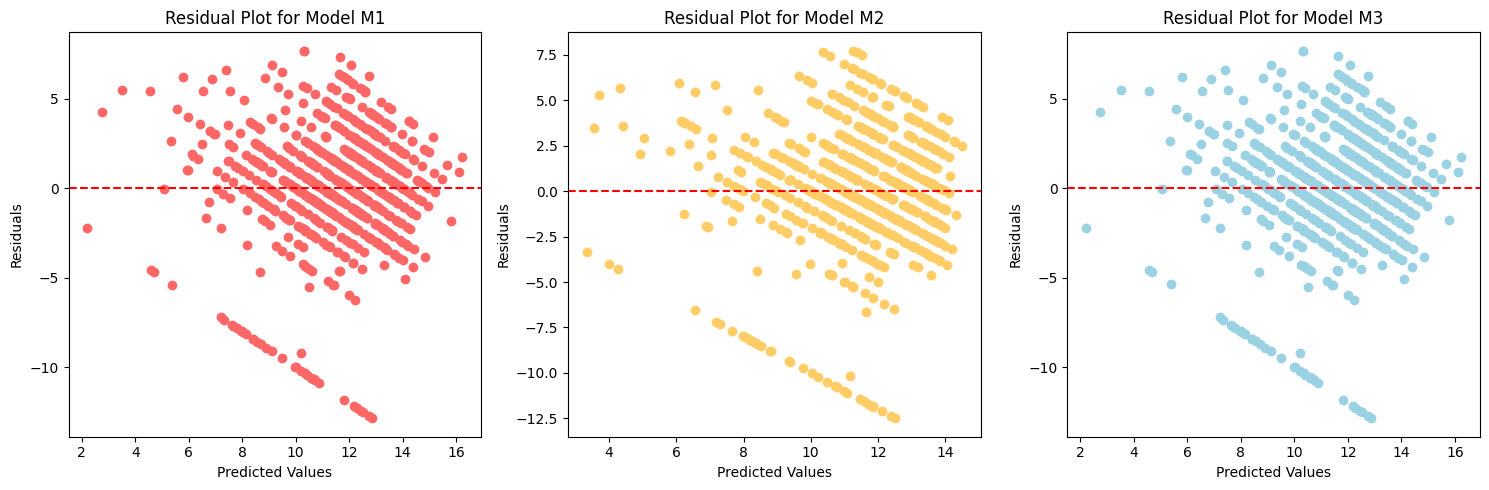

In [16]:
# Obtain the residuals for each model
residuals_m1 = y1 - y_hat1
residuals_m2 = y2 - y_hat2
residuals_m3 = y3 - y_hat3

# Plot the residuals against the predicted values
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_hat1, residuals_m1, color='#FF6666')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Model M1')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 3, 2)
plt.scatter(y_hat2, residuals_m2, color='#FFCC66')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Model M2')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 3, 3)
plt.scatter(y_hat3, residuals_m3, color='#9AD1E3')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Model M3')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


In [37]:
print(residuals_m1.to_numpy())

[-5.40625446e+00 -5.41785921e+00  4.00905406e+00 -1.86976054e+00
  2.57759535e+00 -1.76424145e-01  6.26558247e+00 -3.03956053e+00
 -6.51188188e-01  2.01586861e+00 -7.19131145e-01  4.82078044e+00
  1.89998950e+00 -1.65298554e+00 -2.18871774e+00  1.91871535e+00
  1.50805752e+00  4.12586383e+00 -2.32974987e+00  6.34319779e-01
  6.23101319e-01 -9.66361523e-01 -1.25899570e-01  3.91247876e+00
  6.20287064e+00  3.47234183e+00  3.00509473e+00  1.88582598e+00
  1.78832551e+00 -4.16839234e-01  2.19675309e-01  3.76804192e-01
  2.28411396e+00 -1.26002582e+00  1.87654624e+00 -9.94081543e-01
 -1.53897997e+00  2.42713815e+00 -6.89862031e-01  2.79768534e+00
  1.40546985e+00 -4.25527020e+00 -2.24011942e+00  2.94375137e+00
  2.74398103e+00 -1.44815804e+00 -6.05837825e-02  2.87615055e+00
  9.65522211e-01 -2.09140796e+00 -5.89937313e-01  5.45082831e+00
 -5.49833356e+00 -5.19892726e+00 -7.52567099e-01 -4.39724086e+00
  1.16283577e+00 -1.80278386e+00 -4.64004869e+00 -4.49198109e+00
 -2.30201211e+00  5.29592

3-(5) Do residuals of M1, M2, and M3 follow the normal distribution based on the Jarque-Bera test? (significance level is 0.05). If residuals do not follow the normal distribution, what might be the cause?

In [54]:
skew1 = skew(residuals_m1)
skew2 = skew(residuals_m2)
skew3 = skew(residuals_m3)

kurtosis1 = kurtosis(residuals_m1, fisher=True)
kurtosis2 = kurtosis(residuals_m2, fisher=True)
kurtosis3 = kurtosis(residuals_m3, fisher=True)

def JB(skew, kurt, n, p):
    JB = ((n - p) / 6) * ((skew ** 2) + ((kurt - 3) ** 2) / 4)
    return JB

jb1 = JB(skew1, kurtosis1, n_sample_m1, n_feature_m1)
jb2 = JB(skew2, kurtosis2, n_sample_m2, n_feature_m2)
jb3 = JB(skew3, kurtosis3, n_sample_m3, n_feature_m3)

p_value_jb1 = 1 - chi2.cdf(jb1, 2)
p_value_jb2 = 1 - chi2.cdf(jb2, 2)
p_value_jb3 = 1 - chi2.cdf(jb3, 2)

print("Model M1:")
print("Jarque-Bera statistic:", jb1)
print("p-value:", p_value_jb1)

print("\nModel M2:")
print("Jarque-Bera statistic:", jb2)
print("p-value:", p_value_jb2)

print("\nModel M3:")
print("Jarque-Bera statistic:", jb3)
print("p-value:", p_value_jb3)

Model M1:
Jarque-Bera statistic: 128.06470615240193
p-value: 0.0

Model M2:
Jarque-Bera statistic: 131.18616694225994
p-value: 0.0

Model M3:
Jarque-Bera statistic: 128.3436187046246
p-value: 0.0


In [50]:
from scipy.stats import jarque_bera

jb_stat1, p_value1 = jarque_bera(residuals_m1)
jb_stat2, p_value2 = jarque_bera(residuals_m2)
jb_stat3, p_value3 = jarque_bera(residuals_m3)

print("Model M1:")
print("Jarque-Bera statistic:", jb_stat1)
print("p-value:", p_value1)

print("\nModel M2:")
print("Jarque-Bera statistic:", jb_stat2)
print("p-value:", p_value2)

print("\nModel M3:")
print("Jarque-Bera statistic:", jb_stat3)
print("p-value:", p_value3)


Model M1:
Jarque-Bera statistic: 325.9060118163126
p-value: 1.6998426609913845e-71

Model M2:
Jarque-Bera statistic: 237.93177897283525
p-value: 2.1566052660072356e-52

Model M3:
Jarque-Bera statistic: 326.4058293671349
p-value: 1.323959567636708e-71


# Logistic regression

Using Cardiovascular disease dataset, build a classifier through logistic regression.

The included variables in this dataset as follows.

* cardio: Dependent variable, indicating the presence or absence of cardiovascular disease (binary: yes or no)
* age: age of the individuals in years
* gender: gender (binary: F or M)
* height: height in centimeters
* weight: weight in kilograms
* ap_hi: systolic blood pressure
* ap_lo: diastolic blood pressure
* cholesterol: cholesterol level (ordinal: from 1 to 3)
* gluc: glucose level (ordinal: from 1 to 3)
* smoke: whether a person smokes (binary: yes or no)
* alco: whether a person consumes alcohol (binary: yes or no)
* active: whether a person engages in regular physical activity (binary: yes or no)
  

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv("cardio_original.csv")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61,F,155,69.0,130,80,above normal,above normal,no,no,yes,no
1,40,F,163,71.0,110,70,normal,normal,no,no,yes,yes
2,60,F,165,70.0,120,80,normal,normal,no,no,yes,no
3,39,M,165,85.0,120,80,normal,normal,yes,yes,yes,no
4,64,F,155,62.0,120,80,normal,normal,no,no,yes,no


In [20]:
numerical_columns = df.describe().columns
df["gender"] = df["gender"].map({"M": 1, "F": 0})
df["cholesterol"] = df["cholesterol"].map(
    {"normal": 1, "above normal": 2, "well above normal": 3}
)
df["gluc"] = df["gluc"].map(
    {"normal": 1, "above normal": 2, "well above normal": 3}
)
df["smoke"] = df["smoke"].map({"yes": 1, "no": 0})
df["alco"] = df["alco"].map({"yes": 1, "no": 0})
df["active"] = df["active"].map({"yes": 1, "no": 0})
df["cardio"] = df["cardio"].map({"yes": 1, "no": 0})

(1) pre-process data. Some data samples have outliers for some variables, and they need to be properly addressed for accurate analysis. Implement box-plot-based outlier removal.

After removing outliers, split the whole dataset into training/test sets (8:2). Please maintain the same ratio of classes in both the training and test set.

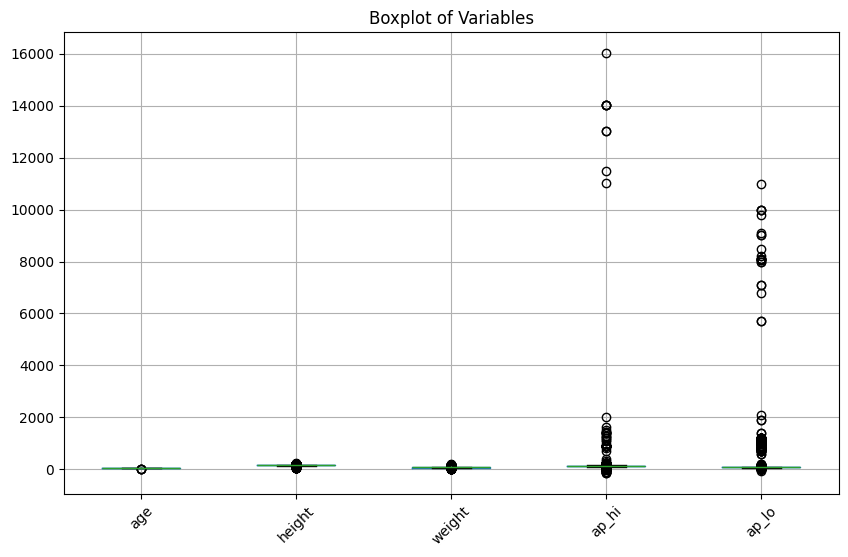

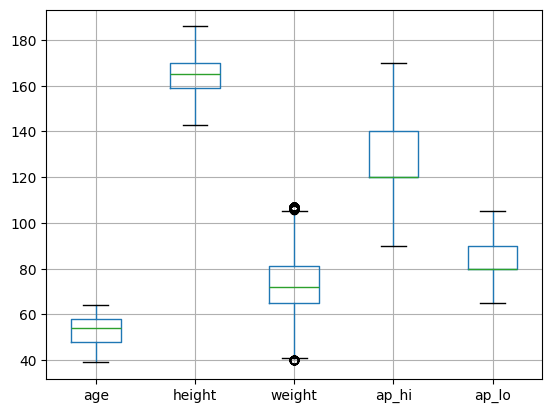

In [21]:
plt.figure(figsize=(10, 6))
df.boxplot(list(numerical_columns))
plt.xticks(ticks=range(1, len(numerical_columns) + 1), labels=numerical_columns, rotation=45)
plt.title('Boxplot of Variables')
plt.show()

pp_df = df.copy()

for column in numerical_columns:
    q1 = pp_df[column].quantile(0.25)
    q3 = pp_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    pp_df = pp_df[(pp_df[column] >= lower_bound) & (pp_df[column] <= upper_bound)]

# print(len(df))
# print(len(pp_df))

# pre_processed_df.to_excel("pre_processed_df.xlsx")
pp_df.boxplot(list(numerical_columns))
plt.show()

# split the whole dataset into training/test set.
X = pp_df.drop(columns=['cardio'])  # Features
y = pp_df['cardio']  # Target variable

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

(2) Train logistic regression model using one of the explanatory variables using x_train and then calculate accuracy of the models using x_valid. Which variable is the most important according to the accuracy?

In [22]:
explanatory_variables = pp_df.columns.drop('cardio')

accuracy_results = {}

for variable in explanatory_variables:
    X_train_variable = X_train[[variable]]  
    X_valid_variable = X_valid[[variable]] 

    model = LogisticRegression()
    model.fit(X_train_variable, y_train)
    
    y_pred = model.predict(X_valid_variable)
    
    correct_predictions = (y_pred == y_valid).sum()
    total_predictions = len(y_pred)
    accuracy = correct_predictions / total_predictions
    
    accuracy_results[variable] = accuracy

sorted_results = sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True)

for variable, accuracy in sorted_results:
    print(f'Variable: {variable}, Accuracy: {accuracy}')


Variable: ap_hi, Accuracy: 0.7135816433707683
Variable: ap_lo, Accuracy: 0.6531469661468854
Variable: age, Accuracy: 0.6003878161105276
Variable: cholesterol, Accuracy: 0.5930354690151086
Variable: weight, Accuracy: 0.5663731114163367
Variable: gluc, Accuracy: 0.5399531388866445
Variable: active, Accuracy: 0.5255716247879131
Variable: height, Accuracy: 0.5178960976003878
Variable: gender, Accuracy: 0.5061808192615335
Variable: smoke, Accuracy: 0.5061808192615335
Variable: alco, Accuracy: 0.5061808192615335


(3) Using the top two variables with the highest accuracy obtained for queestion (1), train a logistic regression model on x_train. Draw the decision boundary showing equal probability values for classes 0 and 1 (x: 1st rank variable, y: 2nd rank variable) with scatterplots of the samples used for the training (assign different colors depending on the predicted class for the scatterplot)

C:\Users\elaus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


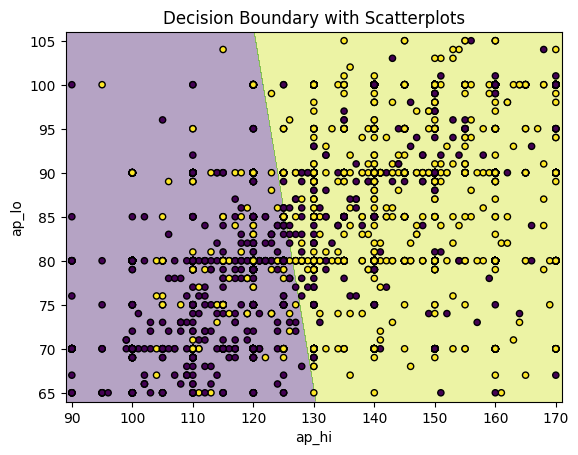

In [23]:
top_two_variables = [result[0] for result in sorted_results[:2]]

columns_to_keep = ['cardio'] + top_two_variables 
pp_df_selected = pp_df[columns_to_keep]

y = pp_df_selected['cardio']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

top_two_variables = [result[0] for result in sorted_results[:2]]

X_train_selected = X_train[top_two_variables]

model = LogisticRegression()
model.fit(X_train_selected, y_train)

x_min, x_max = X_train_selected[top_two_variables[0]].min() - 1, X_train_selected[top_two_variables[0]].max() + 1
y_min, y_max = X_train_selected[top_two_variables[1]].min() - 1, X_train_selected[top_two_variables[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_selected[top_two_variables[0]], X_train_selected[top_two_variables[1]], c=y_train, s=20, edgecolors='k')
plt.xlabel(top_two_variables[0])
plt.ylabel(top_two_variables[1])
plt.title('Decision Boundary with Scatterplots')
plt.show()

(4) Using cardiovascular disease dataset, calculate accuracy with varying cutoff for the final decision. Candidates of cutoff is [0.05, 0.1, ..., 0.95]. Draw a line plot (x: cutoff, y: accuracy). For this problem, the model is trained using x_train and accuracy is calculated using x_valid.

(69301, 11)
(69301,)


C:\Users\elaus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


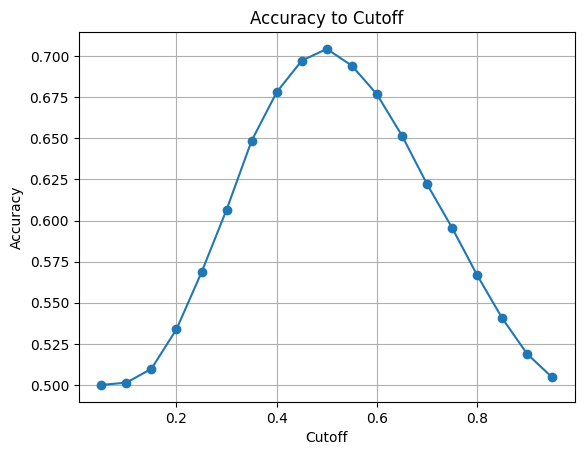

In [24]:
X1 = df.drop(columns=['cardio'])
y1 = df['cardio']

print(X1.shape)
print(y1.shape)
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state=42)


model = LogisticRegression()
model.fit(X1_train, y1_train)

probabilities = model.predict_proba(X1_valid)[:, 1]
cutoffs = np.arange(0.05, 1, 0.05)
accuracy_scores = []
accuracy_scores2 = []


for cutoff in cutoffs:
    predictions = (probabilities >= cutoff).astype(int)
    correct_predictions = (predictions == y1_valid).sum()
    total_predictions = len(y1_valid)
    accuracy = correct_predictions / total_predictions
    accuracy_scores.append(accuracy)

plt.plot(cutoffs, accuracy_scores, marker='o')
plt.xlabel('Cutoff')
plt.ylabel('Accuracy')
plt.title('Accuracy to Cutoff')
plt.grid(True)
plt.show()